In [17]:
from music21 import *
import xml.etree.ElementTree as ET
import os
import matplotlib.pyplot as plt
import numpy as np
import collections
import copy

In [6]:
# Define local path to Music XML dataset 
score_path = './MusicXML'

<h1><center>Set-up and Plotting</center></h1>
The naming convention of the xml files in the SymbTr collection is as follows:

`makam--form--usul--lyrics--composer.xml`

### 1. Sort Makams:

We sort the Makam by their numbers of scores available and take the first **10** ones.

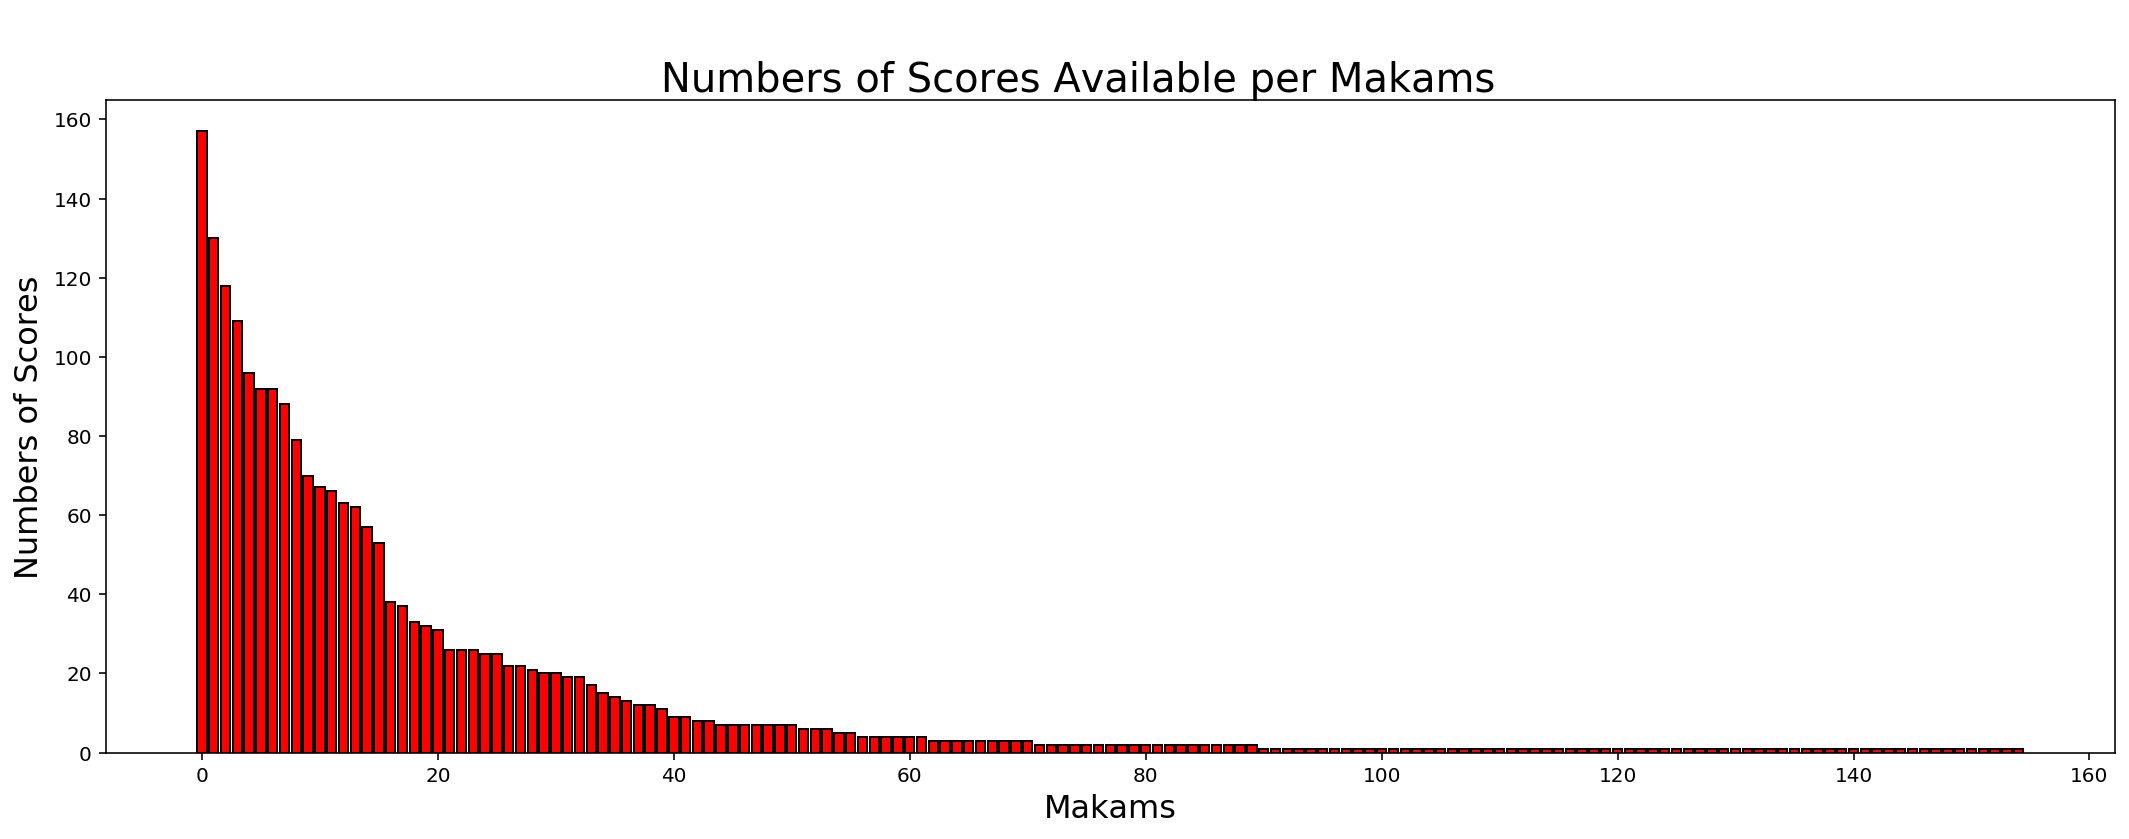

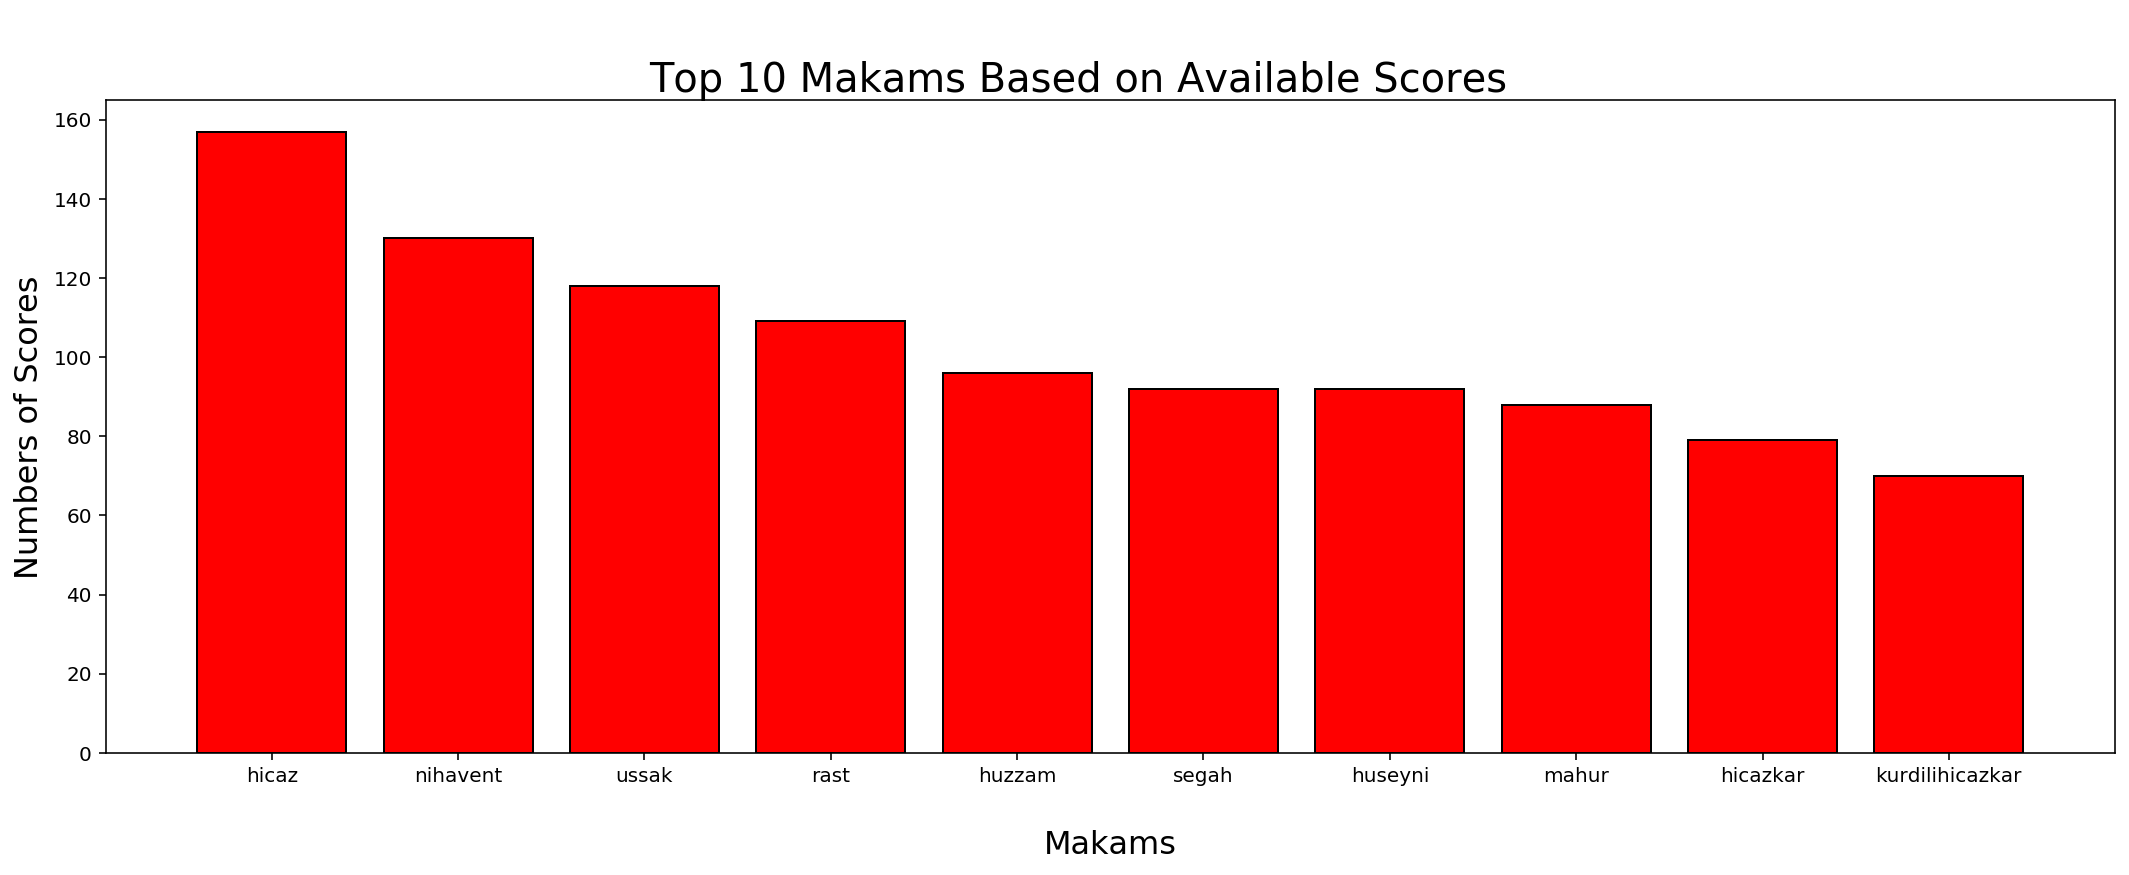

In [7]:
allScores = os.listdir(score_path)

scoresByMakams = {}

for score in allScores:
    if score.endswith('xml'):
        makam = score.split('--')[0]
        if makam in scoresByMakams:
            scoresByMakams[makam].append(score)
        else:
            scoresByMakams[makam] = [score]

# Sort the makams per numbers of scores available
num_scores_per_makam = []
top_makams = [] # Holds the makams in order of their available scores, descendingly.
for k in sorted(scoresByMakams, key=lambda k: len(scoresByMakams[k]), reverse=True):
    num_scores_per_makam.append(len(scoresByMakams[k]))
    top_makams.append(k)

# Plot the numbers of scores per makams
f1, ax1 = plt.subplots(figsize=(18,6))
plt.bar(range(len(num_scores_per_makam)), num_scores_per_makam, color='red', edgecolor='black')
f1.suptitle('\nNumbers of Scores Available per Makams', fontsize=20)
plt.xlabel('Makams', fontsize=16)
plt.ylabel('Numbers of Scores', fontsize=16)
plt.show()

# Only plot the numbers of scores per top makams (total = 10)
f2, ax2 = plt.subplots(figsize=(18,6))
plt.bar(range(10), num_scores_per_makam[:10], color='red', edgecolor='black', tick_label=top_makams[:10])
f2.suptitle('\nTop 10 Makams Based on Available Scores', fontsize=20)
plt.xlabel('\nMakams', fontsize=16)
plt.ylabel('Numbers of Scores', fontsize=16)
plt.show()

<h1><center>Pre-processing Scores</center></h1>

Now that we're clear on what scores we want to work with, we will have to:
* Remove the key signature from these score
* Rewrite all the scores and places then in a well formatted folder structure (each subfolder represent a makam)

**Notes:** If the folder mentioned below exist, this cell will simply be ignored

In [8]:
new_folder = score_path+'_WithoutKeySignature'
if not os.path.isdir(new_folder):
    os.mkdir(new_folder)
    for makam in top_makams[:10]:
        print('Processing '+makam+' scores...')
        makamDir = new_folder+'/'+makam
        os.mkdir(makamDir)
        for makamScore in scoresByMakams[makam]:

            # Remove the key signature from the xml file
            tree = ET.parse(os.path.join(score_path, makamScore))
            root = tree.getroot()

            for k in root.iter('key'):
                for ks in k.findall('key-step'):
                    k.remove(ks)
                for ka in k.findall('key-accidental'):
                    k.remove(ka)
                for ka in k.findall('key-alter'):
                    k.remove(ka)

            # Save the new xml files to be later loaded with music21
            newMakamScore = os.path.join(makamDir, makamScore[:-4] + '_withoutKeySignature.xml')
            tree.write(newMakamScore)
    print('Done!')
else:
    print('The folder with the new scores already exists at: '+new_folder)

The folder with the new scores already exists at: ./MusicXML_WithoutKeySignature


In [22]:
temp = ['A','B','C']
adjacent = dict({'left':[],'right':[]})
adjacents_notes_tonic = {key:copy.deepcopy(adjacent) for key in top_makams[:10]}
adjacents_notes_domin = {key:copy.deepcopy(adjacent) for key in top_makams[:10]}
adjacents_notes_leadt = {key:copy.deepcopy(adjacent) for key in top_makams[:10]}

for root, dirs, files in os.walk(new_folder):
    for file in files:
        current_makam_folder = root.split('/')[-1]
        if file.endswith('xml'):
            filepath = os.path.abspath(('{}/{}'.format(root,file)))
            s = converter.parse(filepath)
            nn = s.parts[0].flat.notes.stream()
            for n in nn:
                # If == TONIC
                if n.name == temp[0]:
                    if not idx == 0:
                        adjacents_notes_tonic[current_makam_folder]['left'].append(nn[idx-1].name)
                    if not idx >= len(nn)-1:
                        adjacents_notes_tonic[current_makam_folder]['right'].append(nn[idx-1].name)
                # If == DOMINANT
                elif n.name == temp[1]:
                    if not idx == 0:
                        adjacents_notes_domin[current_makam_folder]['left'].append(nn[idx-1].name)
                    if not idx >= len(nn)-1:
                        adjacents_notes_domin[current_makam_folder]['right'].append(nn[idx-1].name)
                # If == LEADING TONE
                elif n.name == temp[2]:
                    if not idx == 0:
                        adjacents_notes_leadt[current_makam_folder]['left'].append(nn[idx-1].name)
                    if not idx >= len(nn)-1:
                        adjacents_notes_leadt[current_makam_folder]['right'].append(nn[idx-1].name)

MusicXML_WithoutKeySignature
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihicazkar
kurdilihica

In [70]:
tonic = 'A'
right = []
left = []
s = converter.parse('/Users/dariuspetermann/Git_Checkouts/AMPL-makam-project/MusicXML_WithoutKeySignature/hicaz/hicaz--seyir--duyek--1--sefik_gurmeric_withoutKeySignature.xml')
nn = s.parts[0].flat.notes.stream()
for idx, n in enumerate(nn):
    if n.name == tonic:
        if not idx == 0:
            right.append(nn[idx-1].name)
        if not idx >= len(nn)-1:
            left.append(nn[idx+1].name)
            
stats_left = collections.Counter(left)
print(stats_left)
stats_right = collections.Counter(right)

total_left = sum(stats_left.values())
for key in stats_left:
    stats_left[key] /= total_left
print(stats_left)

Counter({'B': 4, 'G': 4, 'D': 3, 'A': 3, 'E': 1})
Counter({'B': 0.26666666666666666, 'G': 0.26666666666666666, 'D': 0.2, 'A': 0.2, 'E': 0.06666666666666667})
